In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [47]:
df = pd.read_csv('C:/Users/AjithKumar.Pola/Downloads/clustering_dataset.csv')

In [48]:
df.head()

,CUSTOMER_ID,BALANCE,BALANCE_FREQ,PURCHASES,ONE_OFF_PURCHASE,INSTALLMENT_PURCHASES,CASH_IN_ADVANCE,PURCHASE_FREQ,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUSTOMER_ID                       8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQ                      8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONE_OFF_PURCHASE                  8950 non-null   float64
 5   INSTALLMENT_PURCHASES             8950 non-null   float64
 6   CASH_IN_ADVANCE                   8950 non-null   float64
 7   PURCHASE_FREQ                     8950 non-null   float64
 8   ONE_OFF_PURCHASES_FREQUENCY       8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [50]:
df.describe()

,BALANCE,BALANCE_FREQ,PURCHASES,ONE_OFF_PURCHASE,INSTALLMENT_PURCHASES,CASH_IN_ADVANCE,PURCHASE_FREQ,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [51]:
df.drop(['CUSTOMER_ID'], axis = 1, inplace= True)
# checking the modified dataset:
df.head()

,BALANCE,BALANCE_FREQ,PURCHASES,ONE_OFF_PURCHASE,INSTALLMENT_PURCHASES,CASH_IN_ADVANCE,PURCHASE_FREQ,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [52]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQ                          0
PURCHASES                             0
ONE_OFF_PURCHASE                      0
INSTALLMENT_PURCHASES                 0
CASH_IN_ADVANCE                       0
PURCHASE_FREQ                         0
ONE_OFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [53]:
df ['MINIMUM_PAYMENTS'] = df ['MINIMUM_PAYMENTS'].fillna (0)
df ['CREDIT_LIMIT'] = df ['CREDIT_LIMIT'].fillna (0)

In [54]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQ                        0
PURCHASES                           0
ONE_OFF_PURCHASE                    0
INSTALLMENT_PURCHASES               0
CASH_IN_ADVANCE                     0
PURCHASE_FREQ                       0
ONE_OFF_PURCHASES_FREQUENCY         0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans # Class to develop kmeans model
from sklearn import metrics
from sklearn.metrics import silhouette_score # base for clustering
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture 

In [10]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.9 MB/s eta 0:00:00


In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans # Class to develop kmeans model
from sklearn import metrics
from sklearn.metrics import silhouette_score # base for clustering
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture 

In [28]:
import warnings
warnings.filterwarnings('ignore')
import os

In [30]:
from sklearn.decomposition import PCA

In [31]:
#Scaling the data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.490758,-0.679041
1,-0.518463,0.545358


In [32]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(X_principal)

GaussianMixture(n_components=3)

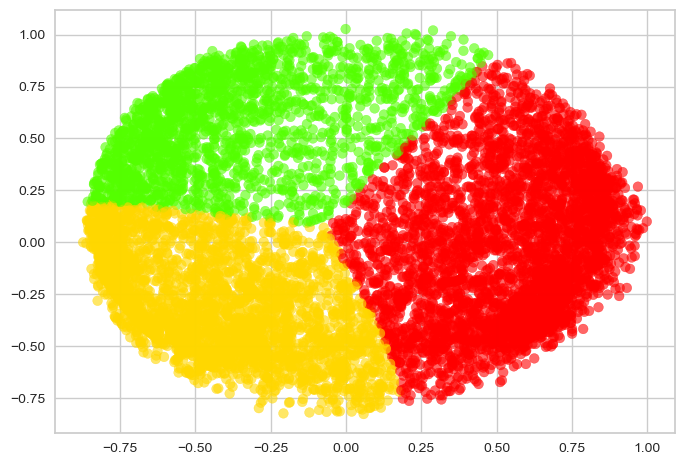

In [45]:
plt.scatter(X_principal['P1'], X_principal['P2'],c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap ='prism', alpha = 0.6) 
plt.show() 